# Business Understanding

## BO1: Anomaly Detection (arf files, Anomaly, normal)
## BO2: Attack Prevention (txt files, DoS,u2r)

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
raw_data = loadarff('KDDTrain+.arff')
raw_data2 = loadarff('KDDTest+.arff')
data = pd.DataFrame(raw_data[0])
data2 = pd.DataFrame(raw_data2[0])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


In [4]:
datatrain = data.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


In [5]:
datatest = data2.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
data2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,b'anomaly'


In [6]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

## Interpretation
Most of the data is numeric, the onky categorical one are protocol_type, service and flag

The others objects are actually numeric but they are coded as string

In [7]:
datatrain.shape[0] - data.isnull().count()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There is missing values in this dataset

In [8]:
def bar_graph(feature,df):
    df[feature].value_counts().plot(kind='bar')

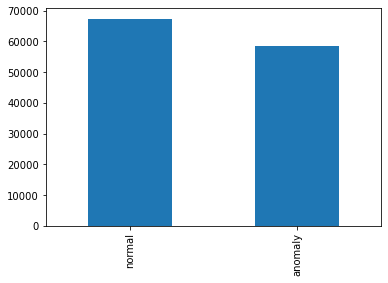

In [9]:
bar_graph('class',datatrain)

normal      0.534583
Attacked    0.465417
Name: class, dtype: float64

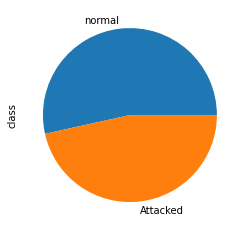

In [10]:
datatrain['class'].apply(lambda x: "Attacked" if x in ['anomaly'] else "normal" ).value_counts().plot.pie()
datatrain['class'].apply(lambda x: "Attacked" if x in ['anomaly'] else "normal").value_counts("t")

There is imbalance in data batween normal and attacked.

To fit it we are going to use specific metrics to evaluate the imbalanced data

# Visualization and feature relations

## Correlation of features

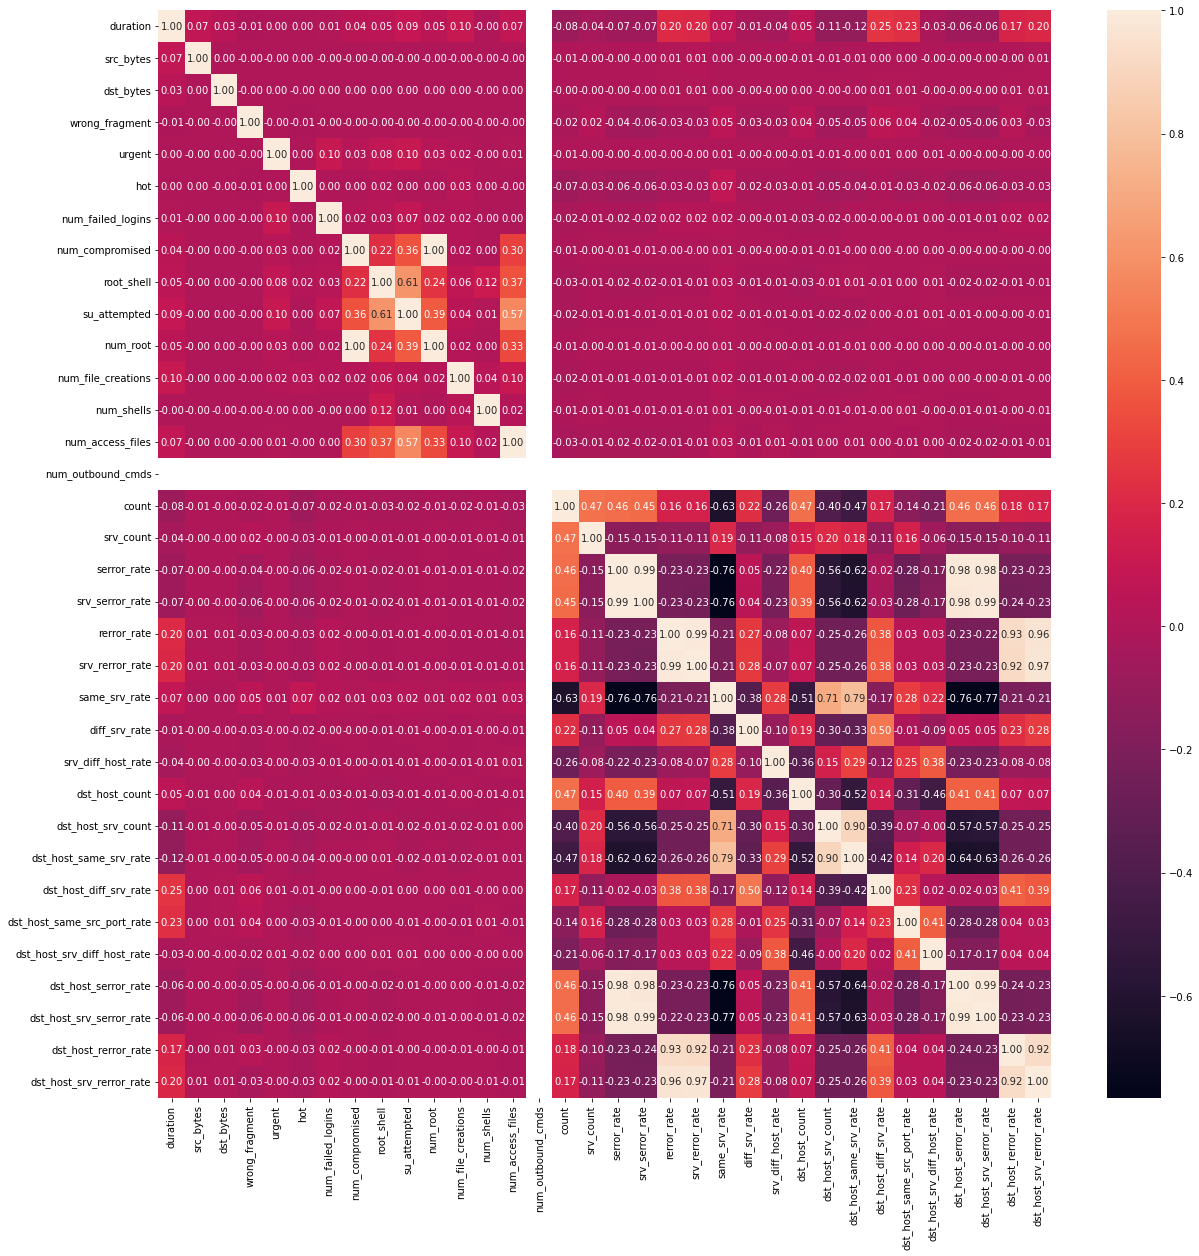

In [11]:
numeric_categorical_features = data.select_dtypes(include= ['int','float','string']).columns
df_numeric_categorical = datatrain[numeric_categorical_features]
corr = df_numeric_categorical.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

Observations:
* num_outbund_cmds have no correlations with other features since all the values are 0
* srv_serror_rate and serror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* srv_rerror_rate and rerror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_rerror_rate and dst_host_srv_rerror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_srv_rerror_rate and srv_error_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_serror_rate and dst_host_srv_serror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_same_srv_rate and dst_host_srv_count are nearly perfectly correlated positively, they have pretty much the same variance
* root and compromised are nearly perfectly correlated positively, they have pretty much the same variance

## Outliers

In [12]:
def showBoxplot(features):
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
    i=0
    j=0
    for x in features:
        data.boxplot(column=x, ax=axes[i,j])
        if j<2:
            j+=1
        else:
            i+=1
            j=0
    plt.show()

In [13]:
selected_data_numeric = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','num_file_creations','num_shells','num_access_files','count','srv_count','dst_host_count','dst_host_srv_count']

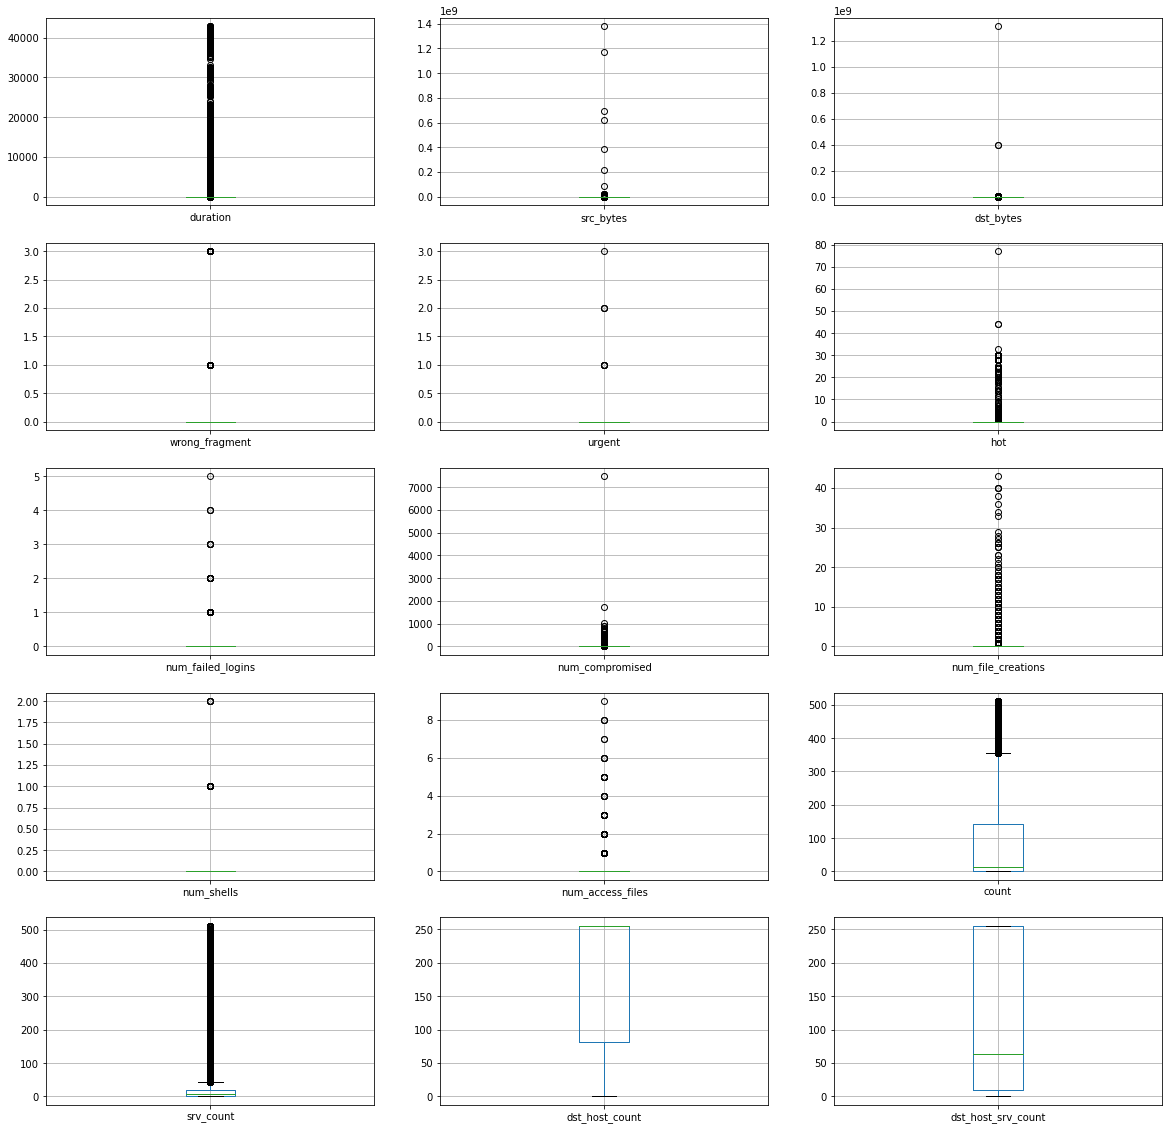

In [14]:
showBoxplot(selected_data_numeric)

In [15]:
print(data['urgent'].value_counts()) #Dropping this feature because the majority of the values (0.99) takes value 0
print(data['wrong_fragment'].value_counts()) #Dropping this feature because the majority of the values (0.99) takes value 0
print(data['hot'].value_counts()) #97.87% of values are 0
print(data['duration'].value_counts()) #92.04% of values are 0
print(data['src_bytes'].value_counts()) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(data['dst_bytes'].value_counts()) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(data['num_failed_logins'].value_counts()) # the majority of the values (99.9%) takes value 0
print(data['num_compromised'].value_counts()) #98.97% of the values are 0
print(data['num_file_creations'].value_counts()) #the majority of the values (99.77%) takes value 0
print(data['num_shells'].value_counts()) # the majority of the values (99.96%) takes value 0
print(data['num_access_files'].value_counts()) # the majority of the values (99.7%) takes value 0
print(data['count'].value_counts()) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(data['srv_count'].value_counts()) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset

0.0    125964
1.0         5
2.0         3
3.0         1
Name: urgent, dtype: int64
0.0    124883
3.0       884
1.0       206
Name: wrong_fragment, dtype: int64
0.0     123302
2.0       1037
1.0        369
28.0       277
30.0       256
4.0        173
6.0        140
5.0         76
24.0        68
19.0        57
22.0        55
3.0         54
18.0        45
14.0        30
20.0         9
7.0          5
15.0         4
11.0         3
25.0         2
9.0          2
44.0         2
77.0         1
17.0         1
12.0         1
10.0         1
8.0          1
21.0         1
33.0         1
Name: hot, dtype: int64
0.0        115955
1.0          1989
2.0           843
3.0           557
4.0           351
            ...  
4946.0          1
5284.0          1
20771.0         1
3294.0          1
679.0           1
Name: duration, Length: 2981, dtype: int64
0.0        49392
8.0         3691
1.0         2432
44.0        2334
45.0        2089
           ...  
1940.0         1
12973.0        1
1899.0         1
16

# III. Data Preparation

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
from sklearn.decomposition import PCA

In [19]:
def Normalization(df):
    return (df-np.min(df))/(np.max(df)-np.min(df))

In [20]:
def Best_n_components(df, params_grid,model):
    gsv =GridSearchCV(model, params_grid)
    gsv.fit(df)
    return gsv.best_params_

In [21]:
def PCA_Transformation(df, dim=None):
    if dim:
        pca = PCA(dim)
        data_transformed = pca.fit_transform(df)
        return pd.DataFrame(data_transformed)
    pca = PCA()
    params = {'n_components': np.arange(1, 24)}
    n = Best_n_components(df, params,pca)['n_components']
    pca = PCA(n)
    data_transformed = pca.fit_transform(df)
    return pd.DataFrame(data_transformed), n

In [22]:
def FGMPM(original_data, data):
    gmm = GaussianMixture(n_components=20,random_state=0)
    gmm.fit(original_data)
    fgmpm = []
    for i in tqdm(range(len(data))):
        row_values = data.iloc[i,:]
        row_probs = []
        memberships = gmm.predict([row_values])
        means = gmm.means_[memberships[0]] 
        covariances = np.sqrt(np.diag(gmm.covariances_[memberships[0]]))

        z_scores = (row_values - means) / covariances

        probs = (1 - norm.cdf(z_scores)) 
        row_probs.extend(probs)

        fgmpm.append(row_probs)
    return pd.DataFrame(fgmpm)

In [23]:
def vote_FGMPM(original_data, threshold):
   
    abnormal_list = (original_data > threshold).sum(axis=1)       
    return abnormal_list

In [24]:
datatrain.drop(columns=['service','flag','num_outbound_cmds','num_root','src_bytes'
    ,'dst_bytes'
    ,'urgent'
    ,'num_failed_logins'
    ,'num_compromised'
    ,'root_shell'
    ,'su_attempted'
    ,'num_root'
    ,'num_file_creations'
    ,'num_shells'
    ,'num_access_files'
    ,'is_host_login'
    ,'is_guest_login'
    ,'wrong_fragment'],inplace=True)
datatest.drop(columns=['service','flag','num_outbound_cmds','num_root','src_bytes'
    ,'dst_bytes'
    ,'urgent'
    ,'num_failed_logins'
    ,'num_compromised'
    ,'root_shell'
    ,'su_attempted'
    ,'num_root'
    ,'num_file_creations'
    ,'num_shells'
    ,'num_access_files'
    ,'is_host_login'
    ,'is_guest_login'
    ,'wrong_fragment'],inplace=True)

We are going to extract tcp data

In [25]:
datatrain = datatrain[datatrain['protocol_type']=='tcp']
datatest = datatest[datatest['protocol_type']=='tcp']

In [26]:
datatrain.head()

,duration,protocol_type,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,0,0.0,0,2.0,2.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
2,0.0,tcp,0,0.0,0,123.0,6.0,1.0,1.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,0,0.0,1,5.0,5.0,0.2,0.2,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,0,0.0,1,30.0,32.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0.0,tcp,0,0.0,0,121.0,19.0,0.0,0.0,1.0,...,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly


In [27]:
datatest.head()

,duration,protocol_type,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,0,0.0,0,229.0,10.0,0.0,0.00,1.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0.0,tcp,0,0.0,0,136.0,1.0,0.0,0.00,1.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2.0,tcp,0,0.0,0,1.0,1.0,0.0,0.00,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
4,1.0,tcp,0,0.0,0,1.0,8.0,0.0,0.12,1.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
5,0.0,tcp,0,0.0,1,4.0,4.0,0.0,0.00,0.0,...,255.0,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


Dropping now the protocol_type feature

In [28]:
datatrain.drop(columns='protocol_type',inplace=True)
datatest.drop(columns='protocol_type',inplace=True)

In [29]:
print(datatrain['class'].value_counts())
print(datatest['class'].value_counts())
print(datatrain.shape)
print(datatest.shape)

normal     53600
anomaly    49089
Name: class, dtype: int64
anomaly    11038
normal      7842
Name: class, dtype: int64
(102689, 24)
(18880, 24)


In [30]:
datatrain.columns

Index(['duration', 'land', 'hot', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [31]:
label_mapping = {"normal": 0, "anomaly": 1}

In [32]:
Y_train =  datatrain['class']
Y_test = datatest['class']

In [33]:
Y_train_enc = list(map(lambda x: label_mapping[x], datatrain['class']))
Y_test_enc = list(map(lambda x: label_mapping[x], datatest['class']))
datatrain.drop(columns='class',inplace=True)
datatest.drop(columns='class',inplace=True)

In [34]:
Y_train = Y_train.reset_index().drop(columns='index')
Y_test = Y_test.reset_index().drop(columns='index')

In [35]:
datatrain = datatrain.reset_index().drop(columns='index')
datatest = datatest.reset_index().drop(columns='index')


In [36]:
datatrain[['land','logged_in']] = datatrain[['land','logged_in']].astype(float)
datatest[['land','logged_in']] = datatest[['land','logged_in']].astype(float)

### d_raw

In [37]:
d_raw_train = datatrain.copy()
d_raw_test = datatest.copy()
#normal
d_raw_train_normal = d_raw_train.loc[list(Y_train[Y_train['class']=='normal'].index),:]

### d_norm

In [38]:
d_norm_train = Normalization(d_raw_train)
d_norm_test = Normalization(d_raw_test)
#normal
d_norm_train_normal = Normalization(d_raw_train_normal)

In [39]:
d_norm_train_normal

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.003914,0.018182,0.00,0.00,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
2,0.0,0.0,0.0,1.0,0.009785,0.045455,0.20,0.20,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0.0,0.0,0.0,1.0,0.058708,0.290909,0.00,0.00,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11,0.0,0.0,0.0,1.0,0.005871,0.063636,0.00,0.00,0.0,0.0,...,0.031373,0.858824,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
15,0.0,0.0,0.0,1.0,0.015656,0.081818,0.00,0.11,0.0,0.0,...,0.356863,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102680,0.0,0.0,0.0,1.0,0.005871,0.027273,0.00,0.00,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
102682,0.0,0.0,0.0,1.0,0.001957,0.009091,0.00,0.00,0.0,0.0,...,0.003922,0.007843,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
102684,0.0,0.0,0.0,1.0,0.005871,0.100000,0.33,0.09,0.0,0.0,...,0.011765,1.000000,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
102686,0.0,0.0,0.0,1.0,0.001957,0.009091,0.00,0.00,0.0,0.0,...,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00


### d_raw_pca

In [40]:
d_raw_pca_train,n = PCA_Transformation(d_raw_train)
print(n)
d_raw_pca_test = PCA_Transformation(d_raw_test,n)
#normal
d_raw_pca_train_normal = PCA_Transformation(d_raw_train_normal,n)
print(n)

23
23


### d_norm_pca

In [41]:
d_norm_pca_train,n = PCA_Transformation(d_norm_train)
print(n)
d_norm_pca_test = PCA_Transformation(d_norm_test,n)
#normal
d_norm_pca_train_normal = PCA_Transformation(d_raw_train_normal,n)
print(n)

22
22


In [42]:
d_raw_pca_train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-280.874779,-8.956844,72.368018,-97.936082,-1.905952,-0.871383,0.342268,0.436093,-0.138093,-0.005936,...,0.052681,0.108604,0.029304,0.067118,0.009206,-0.051355,-0.018433,-0.017279,0.001311,0.001843
1,-281.066615,113.911838,-10.290075,-36.658930,-2.839475,-0.461730,-0.906562,-0.357312,0.006638,-0.069162,...,-0.010246,0.033906,-0.018540,-0.050068,-0.006434,-0.009700,0.001184,0.001534,0.000231,-0.000256
2,-281.947525,-209.478886,38.973714,63.256618,-4.878810,-0.122801,-0.493309,-0.201662,-0.118374,-0.150997,...,-0.040502,-0.001016,0.151999,0.015944,-0.004267,-0.002850,0.043714,0.015713,0.007222,-0.000446
3,-281.675912,-88.623754,-145.368474,9.285187,16.954263,0.273057,0.470671,0.258721,-0.022339,0.094005,...,0.054287,0.004721,0.002620,-0.010882,-0.002856,0.013144,0.001592,0.001775,-0.000509,-0.000083
4,-281.037624,117.132221,-6.824072,-41.462565,10.395759,-0.262111,2.137030,-0.454307,0.127921,-0.257024,...,-0.094757,0.054988,0.006658,-0.004403,-0.012778,-0.018871,0.009175,0.002390,0.001979,0.002022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,-281.985585,-223.361733,60.790815,70.800944,1.706023,-0.036099,-0.536829,-0.285443,-0.041302,0.134660,...,-0.147882,-0.103922,-0.013745,0.034539,0.109037,-0.064663,0.236835,-0.008744,-0.093009,-0.003003
102685,-281.245009,151.994454,-8.389174,11.495445,14.760141,0.052026,-0.542416,-0.125574,0.014841,0.061475,...,0.005118,-0.013900,-0.000997,0.012792,0.001109,0.005806,0.000372,-0.002225,0.001366,-0.000836
102686,-280.726570,36.483796,-16.443883,-130.934379,-5.181863,-0.910126,0.207360,0.895314,-0.022219,-0.137504,...,-0.133988,-0.222495,-0.363895,0.151641,0.191626,-0.110348,0.302590,0.151078,0.044908,-0.004941
102687,-281.059548,138.234623,0.633482,-29.353676,-0.675965,-0.399469,-0.818709,-0.215399,0.018476,-0.061449,...,-0.026291,0.014819,-0.007911,-0.031664,-0.004908,-0.004913,0.000067,0.000161,0.000429,-0.000214


In [43]:
d_raw_pca_test

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-259.608002,211.386476,-1.352496,27.155654,0.621263,-0.086095,0.761533,0.030700,-0.232165,0.189013,...,0.054418,-0.007407,-0.002500,0.015935,-0.007533,-0.001154,0.005826,-0.000940,0.002007,0.000389
1,-258.978644,155.271946,8.790364,-47.183223,-5.075445,-0.262536,0.914724,0.290337,-0.238168,0.261371,...,0.095320,-0.037952,-0.000927,-0.007624,0.071996,0.011371,-0.002595,0.002889,-0.000168,0.001128
2,-256.449627,-33.849030,74.165468,-54.197541,-3.637813,-0.250706,-0.215281,-0.229613,-0.458030,-0.562003,...,0.127709,-0.101660,0.012802,0.111836,-0.047431,-0.060241,0.002184,-0.049536,-0.000897,0.003066
3,-257.940030,-71.795882,162.940542,-13.269662,5.098006,-0.309691,0.982252,0.828852,0.121185,-0.147480,...,-0.184750,-0.045031,0.250612,0.000620,-0.095209,0.125583,-0.212834,-0.006612,0.080981,-0.002044
4,-258.058537,-134.400057,-32.613614,32.207599,-10.270282,-0.103376,-0.034274,0.020742,-0.083896,0.061939,...,-0.020292,0.015087,-0.012733,-0.017869,-0.007532,0.010412,-0.005465,0.017980,-0.001281,-0.001081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18875,-256.709736,-54.682970,-81.062945,-45.676621,-10.116135,-0.170643,-0.061762,-0.350984,0.017048,0.036363,...,0.071934,-0.017602,0.001052,-0.046000,-0.026071,-0.036420,-0.000930,0.002146,-0.003481,0.000195
18876,-258.504065,-81.955134,74.150413,-11.058682,-6.067222,-0.148092,-0.117649,-0.385328,0.014259,0.192899,...,-0.110373,0.074840,-0.003993,-0.022316,-0.000081,0.024067,-0.001186,-0.017955,-0.000905,0.002356
18877,-257.854541,-120.647222,-68.451504,14.796619,-3.922308,-0.097826,-0.028754,-0.074120,0.063012,0.007963,...,0.034834,-0.019327,-0.017466,-0.010769,0.027544,0.014456,-0.004301,0.002674,-0.001770,-0.000023
18878,-257.606081,-97.709621,-117.779962,-5.460790,-5.977245,1.873723,0.060655,0.063794,0.046880,-0.063452,...,0.117229,0.003929,-0.045122,-0.035093,0.013835,0.041219,0.005340,0.001735,0.002002,-0.000608


### d_raw_probs

In [44]:
d_raw_probs_train = FGMPM(d_raw_train,d_raw_train)
d_raw_probs_test = FGMPM(d_raw_train,d_raw_test)
#normal
d_raw_probs_train_normal = FGMPM(d_raw_train_normal,d_raw_train_normal)

100%|██████████| 53600/53600 [00:20<00:00, 2602.36it/s]


### d_norm_probs


In [45]:
d_norm_probs_train = FGMPM(d_norm_train,d_norm_train)
d_norm_probs_test = FGMPM(d_norm_train,d_norm_test)
#normal
d_norm_probs_train_normal = FGMPM(d_norm_train_normal,d_norm_train_normal)

100%|██████████| 53600/53600 [00:21<00:00, 2515.91it/s]


### d_raw_pca_probs


In [46]:
d_raw_pca_probs_train = FGMPM(d_raw_pca_train,d_raw_pca_train)
d_raw_pca_probs_test = FGMPM(d_raw_pca_train,d_raw_pca_test)
#normal
d_raw_pca_probs_train_normal = FGMPM(d_raw_train_normal,d_raw_train_normal)

100%|██████████| 53600/53600 [00:20<00:00, 2605.93it/s]


### d_norm_pca_probs


In [47]:
d_norm_pca_probs_train = FGMPM(d_norm_pca_train,d_norm_pca_train)
d_norm_pca_probs_test = FGMPM(d_norm_pca_train,d_norm_pca_test)
#normal
d_norm_pca_probs_train_normal = FGMPM(d_norm_pca_train_normal,d_norm_pca_train_normal)

100%|██████████| 53600/53600 [00:20<00:00, 2637.38it/s]


# IV. Modelisation

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from kneed import KneeLocator
from sklearn.svm import OneClassSVM, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [49]:
def Vote(original_data,test_data ,min_abnormals = 11, threshold = 0.5):
    threshold_values = original_data.quantile(q=threshold, axis=0)
    threshold_vector = threshold_values.values.flatten()
    N_list = vote_FGMPM(test_data,threshold_vector)
    Y_list = [1 if N >= min_abnormals else 0 for N in N_list]
    Y_array = np.array(Y_list)
    return Y_array

In [50]:
def count_predict(predict_values):
    unique, counts = np.unique(predict_values, return_counts=True)
    return(dict(zip(unique, counts)))
    

In [51]:
def ElbowMethod(df,K):
    wcss=[]
    for k in range(1,K):
        kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    k = KneeLocator(range(1, K), wcss, curve="convex", direction="decreasing")
    
    k.plot_knee()
    plt.plot(range(1,K), wcss, 'bx-')
    plt.title('The Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('wcss')
    plt.show()

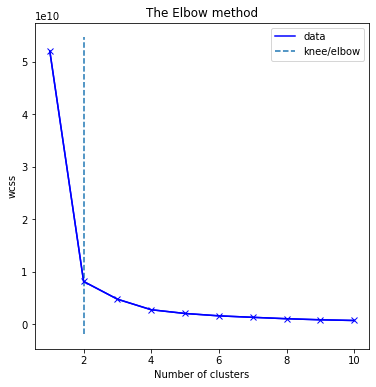

In [52]:
ElbowMethod(d_raw_train_normal,11)

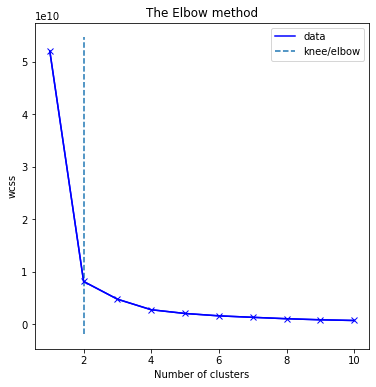

In [53]:
ElbowMethod(d_raw_pca_train_normal,11)

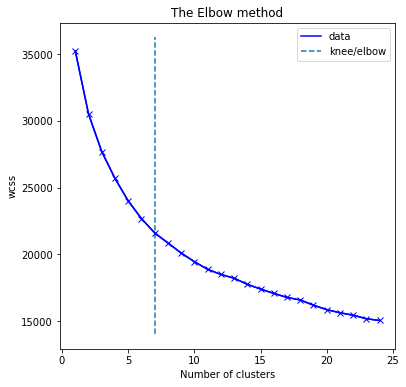

In [54]:
ElbowMethod(d_raw_probs_train_normal,25)

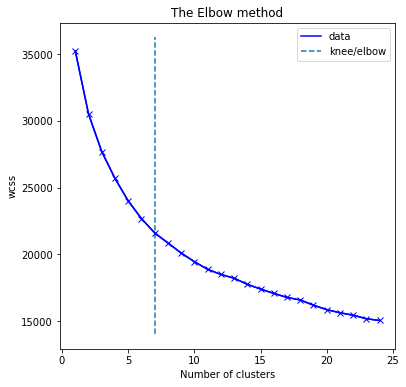

In [55]:
ElbowMethod(d_raw_pca_probs_train_normal,25)

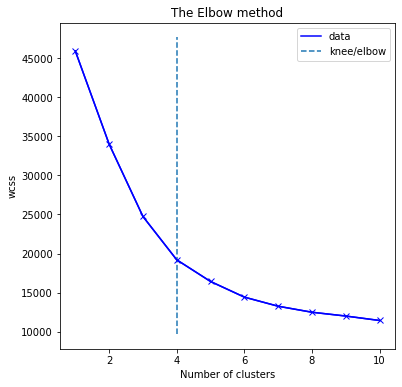

In [56]:
ElbowMethod(d_norm_train_normal,11)

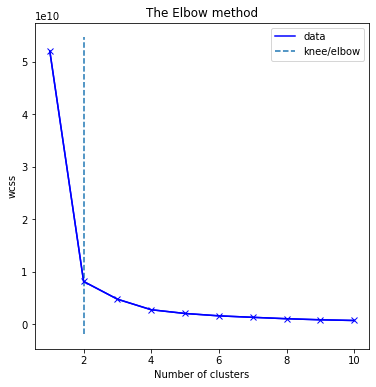

In [57]:
ElbowMethod(d_norm_pca_train_normal,11)

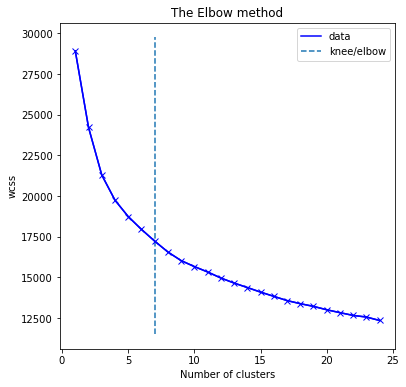

In [58]:
ElbowMethod(d_norm_probs_train_normal,25)

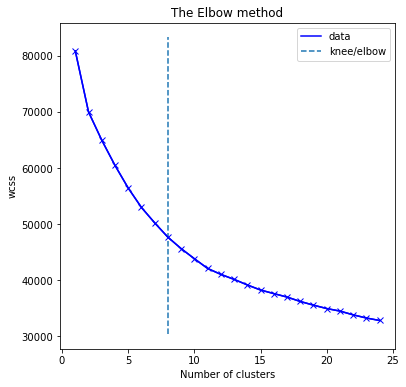

In [59]:
ElbowMethod(d_norm_pca_probs_train_normal,25)

In [60]:
def KMeansD(train_data, test_data, k,threshold=75):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(train_data)
    centroids = kmeans.cluster_centers_ 
    
    #calculate the distances between centroids and the data
    distances = pairwise_distances(train_data, centroids)
    #Selecting the maximum distance between a centroid and an observation for each cluster
    trh = np.percentile(distances,threshold , axis=0)
    distances_test = pairwise_distances(test_data, centroids)

    # Identify anomalies based on distances
    # Assuming anomalies have larger distances than normal data
    predicted = np.any(distances_test > trh, axis=1).astype(int)
    return predicted

In [61]:
def SVMAD(train_data, test_data,nusvm=0.1,kernelsvm='rbf',gammasvm='auto'):
    clf = OneClassSVM(nu=nusvm,kernel=kernelsvm, gamma=gammasvm).fit(train_data)
    
    predictions = clf.predict(test_data)
    
    predictions = [1 if i == -1 else 0 for i in predictions]
    
    return predictions

In [62]:
def KMeansC(train_data, test_data):
    kmeans = KMeans(n_clusters=2, init='k-means++',random_state=0)
    kmeans.fit(train_data)
    predictions = kmeans.predict(test_data)
    return predictions

In [63]:
def SVMC(train_data, test_data, Csvm = 1.0, kernelsvm = 'rbf', gammasvm = 'scale'):
    
    model = SVC(C=Csvm, kernel=kernelsvm, gamma=gammasvm)
    model.fit(X=train_data,y=Y_train_enc)
    
    predictions = model.predict(test_data)
    
    return predictions

In [64]:
def DTC(train_data,test_data):
#     params_grid = {'criterion': ['gini', 'entropy'],
#      'splitter': ['best', 'random','auto'],
#      'max_depth': [2*n for n in np.arange(1,10)],
#      'max_features': ['sqrt','log2','auto'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10]}
    tree = DecisionTreeClassifier()
#     tree_cv = GridSearchCV(tree, params_grid, cv=5)
#     tree_cv.fit(train_data,Y_train_enc)
#     tree = DecisionTreeClassifier(**tree_cv.best_params_)
    tree.fit(train_data, Y_train_enc)
    predictions = tree.predict(test_data)
    return predictions

In [65]:
def MLP(train_data,test_data):
    mlp = MLPClassifier(max_iter=100)
#     parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],}
#     clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
    mlp.fit(train_data, Y_train_enc)
    predictions = mlp.predict(test_data)
    return predictions

## Prediction Phase

## Voting

In [66]:
Y_predv_e1 = '-'
Y_predv_e3 = '-'
Y_predv_e5 = '-'
Y_predv_e7 = '-'

We are not using Voting model for non FGMPM

In [68]:
Y_predv_e2 = Vote(d_norm_probs_train_normal, d_norm_probs_test,min_abnormals = 5, threshold = 0.82)
Y_predv_e4 = Vote(d_norm_pca_probs_train_normal, d_norm_pca_probs_test,min_abnormals = 5, threshold = 0.78)
Y_predv_e6 = Vote(d_raw_probs_train_normal, d_raw_probs_test,min_abnormals = 5, threshold = 0.87)
Y_predv_e8 = Vote(d_raw_pca_probs_train_normal, d_raw_pca_probs_test,min_abnormals = 5, threshold = 0.88)

## KMeans-D

In [69]:
Y_predkd_e1 = KMeansD(d_norm_train_normal,d_norm_test,4,threshold=85)
Y_predkd_e2 = KMeansD(d_norm_probs_train_normal,d_norm_probs_test,7,threshold=85)
Y_predkd_e3 = KMeansD(d_norm_pca_train_normal,d_norm_pca_test,3,threshold=10)
Y_predkd_e4 = KMeansD(d_norm_pca_probs_train_normal,d_norm_pca_probs_test,8,threshold=55)
Y_predkd_e5 = KMeansD(d_raw_train_normal,d_raw_test,2,threshold=85)
Y_predkd_e6 = KMeansD(d_raw_probs_train_normal,d_raw_probs_test,10,threshold=85)
Y_predkd_e7 = KMeansD(d_raw_pca_train_normal,d_raw_pca_test,2,threshold=99.98)
Y_predkd_e8 = KMeansD(d_raw_pca_probs_train_normal,d_raw_pca_probs_test,10,threshold=85)

## SVM-1

In [111]:
Y_preds1_e1 = SVMAD(d_norm_train_normal,d_norm_test,nusvm=0.3)
Y_preds1_e2 = SVMAD(d_norm_probs_train_normal,d_norm_probs_test,nusvm=0.4)
Y_preds1_e3 = SVMAD(d_norm_pca_train_normal,d_norm_pca_test,kernelsvm='sigmoid',nusvm=0.75)
Y_preds1_e4 = SVMAD(d_norm_pca_probs_train_normal,d_norm_pca_probs_test,nusvm=0.5)
Y_preds1_e5 = SVMAD(d_raw_train_normal,d_raw_test,nusvm=0.01)
Y_preds1_e6 = SVMAD(d_raw_probs_train_normal,d_raw_probs_test,nusvm=0.3)
Y_preds1_e7 = SVMAD(d_raw_pca_train_normal,d_raw_pca_test,kernelsvm='sigmoid',nusvm=0.55)
Y_preds1_e8 = SVMAD(d_raw_pca_probs_train_normal,d_raw_pca_probs_test,nusvm=0.15)

In [105]:
count_predict(SVMAD(d_raw_pca_probs_train_normal,d_raw_pca_probs_test,nusvm=0.25))

{0: 8256, 1: 10624}

## KMeans-C

In [71]:
Y_predkc_e1 = KMeansC(d_norm_train,d_norm_test)
Y_predkc_e2 = KMeansC(d_norm_probs_train,d_norm_probs_test)
Y_predkc_e3 = KMeansC(d_norm_pca_train,d_norm_pca_test)
Y_predkc_e4 = KMeansC(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_predkc_e5 = KMeansC(d_raw_train,d_raw_test)
Y_predkc_e6 = KMeansC(d_raw_probs_train,d_raw_probs_test)
Y_predkc_e7 = KMeansC(d_raw_pca_train,d_raw_pca_test)
Y_predkc_e8 = KMeansC(d_raw_pca_probs_train,d_raw_pca_probs_test)

## SVM-2

In [121]:
Y_preds2_e1 = SVMC(d_norm_train,d_norm_test)
Y_preds2_e2 = SVMC(d_norm_probs_train,d_norm_probs_test)
Y_preds2_e3 = SVMC(d_norm_pca_train,d_norm_pca_test)
Y_preds2_e4 = SVMC(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_preds2_e5 = SVMC(d_raw_train,d_raw_test)
Y_preds2_e6 = SVMC(d_raw_probs_train,d_raw_probs_test)
Y_preds2_e7 = SVMC(d_raw_pca_train,d_raw_pca_test)
Y_preds2_e8 = SVMC(d_raw_pca_probs_train,d_raw_pca_probs_test)

## Decision Tree

In [73]:
Y_preddt_e1 = DTC(d_norm_train,d_norm_test)
Y_preddt_e2 = DTC(d_norm_probs_train,d_norm_probs_test)
Y_preddt_e3 = DTC(d_norm_pca_train,d_norm_pca_test)
Y_preddt_e4 = DTC(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_preddt_e5 = DTC(d_raw_train,d_raw_test)
Y_preddt_e6 = DTC(d_raw_probs_train,d_raw_probs_test)
Y_preddt_e7 = DTC(d_raw_pca_train,d_raw_pca_test)
Y_preddt_e8 = DTC(d_raw_pca_probs_train,d_raw_pca_probs_test)

## MLP

In [74]:
Y_predml_e1 = MLP(d_norm_train,d_norm_test)
Y_predml_e2 = MLP(d_norm_probs_train,d_norm_probs_test)
Y_predml_e3 = MLP(d_norm_pca_train,d_norm_pca_test)
Y_predml_e4 = MLP(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_predml_e5 = MLP(d_raw_train,d_raw_test)
Y_predml_e6 = MLP(d_raw_probs_train,d_raw_probs_test)
Y_predml_e7 = MLP(d_raw_pca_train,d_raw_pca_test)
Y_predml_e8 = MLP(d_raw_pca_probs_train,d_raw_pca_probs_test)

# 5. Evaluation

In [75]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [122]:
liste1 = [Y_predv_e1,Y_predkd_e1,Y_preds1_e1,Y_predkc_e1,Y_preds2_e1,Y_preddt_e1,Y_predml_e1]
liste2 = [Y_predv_e2,Y_predkd_e2,Y_preds1_e2,Y_predkc_e2,Y_preds2_e2,Y_preddt_e2,Y_predml_e2]
liste3 = [Y_predv_e3,Y_predkd_e3,Y_preds1_e3,Y_predkc_e3,Y_preds2_e3,Y_preddt_e3,Y_predml_e3]
liste4 = [Y_predv_e4,Y_predkd_e4,Y_preds1_e4,Y_predkc_e4,Y_preds2_e4,Y_preddt_e4,Y_predml_e4]
liste5 = [Y_predv_e5,Y_predkd_e5,Y_preds1_e5,Y_predkc_e5,Y_preds2_e5,Y_preddt_e5,Y_predml_e5]
liste6 = [Y_predv_e6,Y_predkd_e6,Y_preds1_e6,Y_predkc_e6,Y_preds2_e6,Y_preddt_e6,Y_predml_e6]
liste7 = [Y_predv_e7,Y_predkd_e7,Y_preds1_e7,Y_predkc_e7,Y_preds2_e7,Y_preddt_e7,Y_predml_e7]
liste8 = [Y_predv_e8,Y_predkd_e8,Y_preds1_e8,Y_predkc_e8,Y_preds2_e8,Y_preddt_e8,Y_predml_e8]

In [107]:
def total_count():
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]
    
    for i,x in enumerate(listmodels):
        print(x)
        print(count_predict(liste1[i]))
        print(count_predict(liste2[i]))
        print(count_predict(liste3[i]))
        print(count_predict(liste4[i]))
        print(count_predict(liste5[i]))
        print(count_predict(liste6[i]))
        print(count_predict(liste7[i]))
        print(count_predict(liste8[i]))

In [80]:
total_count()

Voting
{'-': 1}
{0: 7562, 1: 11318}
{'-': 1}
{0: 8706, 1: 10174}
{'-': 1}
{0: 7123, 1: 11757}
{'-': 1}
{0: 6519, 1: 12361}
KM-D
{0: 7988, 1: 10892}
{0: 8330, 1: 10550}
{0: 7587, 1: 11293}
{0: 6976, 1: 11904}
{0: 7832, 1: 11048}
{0: 6755, 1: 12125}
{0: 1735, 1: 17145}
{0: 8646, 1: 10234}
SVM-1
{0: 8031, 1: 10849}
{0: 7169, 1: 11711}
{0: 10323, 1: 8557}
{0: 18690, 1: 190}
{0: 7239, 1: 11641}
{0: 14098, 1: 4782}
{1: 18880}
{0: 14822, 1: 4058}
KM-C
{0: 16686, 1: 2194}
{0: 6903, 1: 11977}
{0: 13831, 1: 5049}
{0: 14095, 1: 4785}
{0: 18872, 1: 8}
{0: 13544, 1: 5336}
{0: 18872, 1: 8}
{0: 11666, 1: 7214}
SVM-2
{0: 12277, 1: 6603}
{0: 12127, 1: 6753}
{0: 10710, 1: 8170}
{0: 15167, 1: 3713}
{0: 12456, 1: 6424}
{0: 11669, 1: 7211}
{0: 12148, 1: 6732}
{0: 11664, 1: 7216}
DT
{0: 11969, 1: 6911}
{0: 12004, 1: 6876}
{0: 11115, 1: 7765}
{0: 13547, 1: 5333}
{0: 11901, 1: 6979}
{0: 11768, 1: 7112}
{0: 12167, 1: 6713}
{0: 16718, 1: 2162}
MLP
{0: 11169, 1: 7711}
{0: 11717, 1: 7163}
{0: 10534, 1: 8346}
{0: 

In [130]:
def tab_f1_score(Y_test):
    f1_score1 = []
    f1_score2 = []
    f1_score3 = []
    f1_score4 = []
    f1_score5 = []
    f1_score6 = []
    f1_score7 = []
    f1_score8 = []
    for i in np.arange(7):
        if liste1[i] != '-':
            f1_score1.append(f1_score(Y_test,liste1[i]))
        else:
            f1_score1.append('-')
        f1_score2.append(f1_score(Y_test,liste2[i]))
        if liste3[i] != '-':
            f1_score3.append(f1_score(Y_test,liste3[i]))
        else:
            f1_score3.append('-')
        f1_score4.append(f1_score(Y_test,liste4[i]))
        if liste5[i] != '-':
            f1_score5.append(f1_score(Y_test,liste5[i]))
        else:
            f1_score5.append('-')
        f1_score6.append(f1_score(Y_test,liste6[i]))
        if liste7[i] != '-':
            f1_score7.append(f1_score(Y_test,liste7[i]))
        else:
            f1_score7.append('-')
        f1_score8.append(f1_score(Y_test,liste8[i]))
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]
    dictdf = {'Models' : listmodels, 'E1': f1_score1 ,'E2': f1_score2, 'E3': f1_score3, 'E4': f1_score4, 'E5': f1_score5,
             'E6': f1_score6, 'E7': f1_score7 , 'E8': f1_score8}
    df = pd.DataFrame(dictdf)
    return df

In [131]:
def Sensitivity(Y_test):
    recalle1 = []
    recalle2 = []
    recalle3 = []
    recalle4 = []
    recalle5 = []
    recalle6 = []
    recalle7 = []
    recalle8 = []
    for i in np.arange(7):
        if liste1[i] != '-':
            recalle1.append(recall_score(Y_test,liste1[i]))
        else:
            recalle1.append('-')
        recalle2.append(recall_score(Y_test,liste2[i]))
        if liste3[i] != '-':
            recalle3.append(recall_score(Y_test,liste3[i]))
        else:
            recalle3.append('-')
        recalle4.append(recall_score(Y_test,liste4[i]))
        if liste5[i] != '-':
            recalle5.append(recall_score(Y_test,liste5[i]))
        else:
            recalle5.append('-')
        recalle6.append(recall_score(Y_test,liste6[i]))
        if liste7[i] != '-':
            recalle7.append(recall_score(Y_test,liste7[i]))
        else:
            recalle7.append('-')
        recalle8.append(recall_score(Y_test,liste8[i]))
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]
    dictdf = {'Models' : listmodels, 'E1': recalle1 ,'E2': recalle2, 'E3': recalle3, 'E4': recalle4, 'E5': recalle5,
             'E6': recalle6, 'E7': recalle7 , 'E8': recalle8}
    df = pd.DataFrame(dictdf)
    return df

In [83]:
Y_test_enc.count(1)

11038

In [84]:
def cap_score(y_test,y_pred):
    cf_matirx = confusion_matrix(y_test,y_pred)
    true_positives = cf_matirx[1, 1]
    false_positives = cf_matirx[0, 1]
    true_negatives = cf_matirx[0, 0]
    false_negatives = cf_matirx[1, 0]
    ppv = true_positives/(true_positives+false_positives)
    npv = true_negatives/(true_negatives+false_negatives)
    B = y_test.count(1)/len(y_test)
    cap = B*(ppv*npv)/(ppv+npv)
    return cap

In [132]:
def CAP(Y_test):
    cap1 = []
    cap2 = []
    cap3 = []
    cap4 = []
    cap5 = []
    cap6 = []
    cap7 = []
    cap8 = []
    for i in np.arange(7):
        if liste1[i] != '-':
            cap1.append(cap_score(Y_test,liste1[i]))
        else:
            cap1.append('-')
        cap2.append(cap_score(Y_test,liste2[i]))
        if liste3[i] != '-':
            cap3.append(cap_score(Y_test,liste3[i]))
        else:
            cap3.append('-')
        cap4.append(cap_score(Y_test,liste4[i]))
        if liste5[i] != '-':
            cap5.append(cap_score(Y_test,liste5[i]))
        else:
            cap5.append('-')
        cap6.append(cap_score(Y_test,liste6[i]))
        if liste7[i] != '-':
            cap7.append(cap_score(Y_test,liste7[i]))
        else:
            cap7.append('-')
        cap8.append(cap_score(Y_test,liste8[i]))
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]
    dictdf = {'Models' : listmodels, 'E1': cap1 ,'E2': cap2, 'E3': cap3, 'E4': cap4, 'E5': cap5,
             'E6': cap6, 'E7': cap7 , 'E8': cap8}
    df = pd.DataFrame(dictdf)
    return df

In [133]:
tab_f1_score(Y_test_enc)

C:\Users\asus\AppData\Local\Temp\ipykernel_19448\3779523990.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste1[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\3779523990.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste3[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\3779523990.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste5[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\3779523990.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste7[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\3779523990.py:11: FutureWarning: elementwise comparison failed; returning scalar instea

,Models,E1,E2,E3,E4,E5,E6,E7,E8
0,Voting,-,0.753444,-,0.601263,-,0.844220,-,0.614813
1,KM-D,0.880438,0.705762,0.913797,0.721820,0.79616,0.828649,0.662456,0.753291
2,SVM-1,0.873395,0.763462,0.849911,0.637376,0.84942,0.841726,0.296718,0.641466
3,KM-C,0.330713,0.621421,0.617393,0.534412,0.000181,0.643093,0.000181,0.770765
4,SVM-2,0.739754,0.752628,0.807997,0.404697,0.710915,0.782399,0.719977,0.622220
5,DT,0.762048,0.759853,0.778812,0.441024,0.766387,0.772672,0.716692,0.261212
6,MLP,0.813483,0.775782,0.828828,0.507171,0.729799,0.781125,0.805865,0.556092


In [124]:
Sensitivity(Y_test_enc)

C:\Users\asus\AppData\Local\Temp\ipykernel_19448\2390607337.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste1[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\2390607337.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste3[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\2390607337.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste5[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\2390607337.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste7[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\2390607337.py:11: FutureWarning: elementwise comparison failed; returning scalar instea

,Models,E1,E2,E3,E4,E5,E6,E7,E8
0,Voting,-,0.763001,-,0.577731,-,0.871716,-,0.651658
1,KM-D,0.874615,0.690161,0.924352,0.750136,0.796521,0.869451,0.845715,0.725856
2,SVM-1,0.865918,0.786737,0.754394,0.515854,0.872622,0.825331,0.174851,0.532705
3,KM-C,0.198224,0.647853,0.4499,0.383040,0.000091,0.476989,0.000091,0.637253
4,SVM-2,0.59114,0.606541,0.703026,0.270067,0.56233,0.646766,0.579543,0.514495
5,DT,0.619587,0.616597,0.663345,0.327052,0.625476,0.635260,0.576282,0.156188
6,MLP,0.690886,0.639609,0.727759,0.366824,0.578094,0.644863,0.749321,0.412031


In [125]:
CAP(Y_test_enc)

C:\Users\asus\AppData\Local\Temp\ipykernel_19448\1425041106.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste1[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\1425041106.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste3[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\1425041106.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste5[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\1425041106.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if liste7[i] != '-':
C:\Users\asus\AppData\Local\Temp\ipykernel_19448\1425041106.py:11: FutureWarning: elementwise comparison failed; returning scalar instea

,Models,E1,E2,E3,E4,E5,E6,E7,E8
0,Voting,-,0.203511,-,0.155999,-,0.236696,-,0.140660
1,KM-D,0.25008,0.189731,0.262112,0.189109,0.219899,0.230665,0.01043,0.207631
2,SVM-1,0.247625,0.206043,0.245259,0.195133,0.238666,0.236855,0.183342,0.192114
3,KM-C,0.186658,0.147500,0.208853,0.190651,0.056168,0.212105,0.056168,0.229435
4,SVM-2,0.225449,0.227787,0.234428,0.173517,0.219086,0.232749,0.218918,0.187348
5,DT,0.229186,0.228839,0.228131,0.158387,0.229891,0.230692,0.218168,0.166468
6,MLP,0.23853,0.231210,0.239794,0.181497,0.224025,0.232553,0.227931,0.189366


## Interpretation:
On Average A Non supervised model with normal data training is performing better than others as expected.

The best results achieved are from KMeans-D from e3 and e1 (d_norm_pca and d_norm) with 0.913 and 0.88 followed by One Class SVM and GMM with f1-score between 0.849 and 0.841 Although SVM-1 did not really perform  on e7.

KM-C is struggling with 2 datasets that results in very low f1_score and it is doing worse on average than other non supervised.

MLP is doing well except for e4 and e8 since the sensitivity is lower than 0.5 (it looks like it doesn't perform well when we apply PCA and FGMPM at the same time)

The same thing could be applied for DT but it have a bit worse f1-score and sensitivty in average.

Although MLP and Decision Tree results are acceptable, keep in mind to train them we need to have both normal and anomaly data 

## ROC

To compare between the models effectively we are going to use e6 dataset since pretty much all the models are performing pretty well so they should be above the random classifier

In [134]:
from sklearn.metrics import roc_curve, auc

In [135]:
fpr1, tpr1, threshold1 = roc_curve(Y_test_enc, Y_predv_e6)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(Y_test_enc, Y_predkd_e6)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(Y_test_enc, Y_preds1_e6)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(Y_test_enc, Y_predkc_e6)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(Y_test_enc, Y_preds2_e6)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(Y_test_enc, Y_preddt_e6)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(Y_test_enc, Y_predml_e6)
roc_auc7 = auc(fpr7, tpr7)

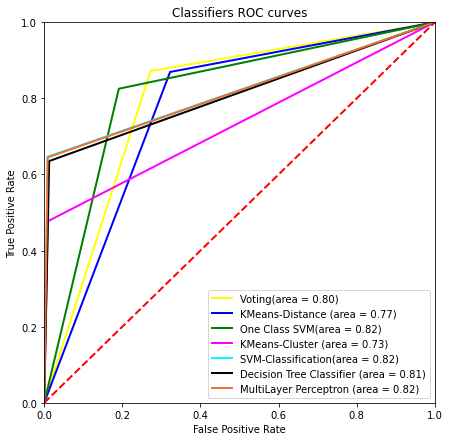

In [139]:
plt.figure(figsize=(7,7))
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Voting(area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='KMeans-Distance (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='One Class SVM(area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='KMeans-Cluster (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='cyan', lw=2, label='SVM-Classification(area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='Decision Tree Classifier (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='#EF6E35', lw=2, label='MultiLayer Perceptron (area = %0.2f)'% roc_auc7)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

## Interpretation:
All the models have ROC values higher than 0.5

KMeans-Cluster is clearly the worst model here under beneath all the other models

All the Classification problems stabalizes very fast compared to the non supervervised learning

Anomaly detections models are going to be above from the classification one when FPR is around 0.2

KMeans-Distance does have worse ROC value this time (0.77) but we didn't really select the best version of KMeans here since we want to compare all the models in the same conditions